In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

# 모델에 적용할 데이터 셋 준비 
x = train.drop(columns=['type', 'type_num'], axis=1)
y = train['type_num']

x = x.drop(columns=['fiberID'], axis=1)
test_x = test.drop(columns=['fiberID'],axis=1)

x_name=x.columns

In [3]:
y=np.array(y)

In [4]:
x=np.array(x)
test_x = np.array(test_x)

In [5]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV

#x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y,train_size=0.8, shuffle=True ,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=True ,random_state=0)


/home/lab21/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler=StandardScaler()
scaler1=RobustScaler()
scaler1.fit(x_train)
x_train=scaler1.transform(x_train)
x_test=scaler1.transform(x_test)


#scaler3=StandardScaler()
scaler2=RobustScaler()
scaler2.fit(test_x)
test_x =scaler2.transform(test_x)

In [7]:
# from sklearn.preprocessing import StandardScaler, RobustScaler


# scaler1=RobustScaler()
# scaler1.fit(x_train)
# x_train=scaler1.transform(x_train)
# x_test=scaler1.transform(x_test)

# scaler2=StandardScaler()
# scaler2.fit(x_train)
# x_train=scaler2.transform(x_train)
# x_test=scaler2.transform(x_test)

# scaler3=StandardScaler()
# scaler3.fit(x_train)
# x_train=scaler3.transform(x_train)
# x_test=scaler3.transform(x_test)

# scaler4=StandardScaler()
# scaler4.fit(x_train)
# x_train=scaler4.transform(x_train)
# x_test=scaler4.transform(x_test)

# #############

# scaler5=RobustScaler()
# scaler5.fit(test_x)
# test_x =scaler5.transform(test_x)

# scaler6=StandardScaler()
# scaler6.fit(test_x)
# test_x =scaler6.transform(test_x)

# scaler7=StandardScaler()
# scaler7.fit(test_x)
# test_x =scaler7.transform(test_x)

# scaler8=StandardScaler()
# scaler8.fit(test_x)
# test_x =scaler8.transform(test_x)


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [10]:
model=Sequential()

model.add(Dense(64,activation='elu',input_dim=20)) # input dimension
model.add(Dense(128,activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='elu'))
model.add(Dense(128,activation='elu'))
model.add(Dense(128,activation='elu'))

# model.add(Dense(256,activation='elu'))
# model.add(Dense(512,activation='elu'))
# model.add(Dropout(0.5))
# model.add(Dense(1024,activation='elu'))
# model.add(Dense(512,activation='elu'))
# model.add(Dense(256,activation='elu'))
# model.add(Dropout(0.5))
# model.add(Dense(256,activation='elu'))
# model.add(Dense(128,activation='elu'))
model.add(Dense(19,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)      

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=30)

hist= model.fit(x_train, y_train, batch_size=64*4, epochs=60, verbose=2, validation_split=0.2, callbacks=[early_stopping] )
loss, acc = model.evaluate(x_test,y_test,batch_size=64*4)
print('Loss:',loss,'Accuracy:',acc)

Instructions for updating:
Use tf.cast instead.
Train on 127993 samples, validate on 31999 samples
Epoch 1/60
 - 2s - loss: 0.7499 - acc: 0.7661 - val_loss: 0.5415 - val_acc: 0.8197
Epoch 2/60
 - 2s - loss: 0.5544 - acc: 0.8167 - val_loss: 0.4943 - val_acc: 0.8342
Epoch 3/60
 - 2s - loss: 0.5276 - acc: 0.8246 - val_loss: 0.4920 - val_acc: 0.8359
Epoch 4/60
 - 2s - loss: 0.5117 - acc: 0.8281 - val_loss: 0.4777 - val_acc: 0.8392
Epoch 5/60
 - 2s - loss: 0.4951 - acc: 0.8324 - val_loss: 0.4578 - val_acc: 0.8449
Epoch 6/60
 - 2s - loss: 0.4871 - acc: 0.8345 - val_loss: 0.4452 - val_acc: 0.8467
Epoch 7/60
 - 2s - loss: 0.4789 - acc: 0.8362 - val_loss: 0.4648 - val_acc: 0.8407
Epoch 8/60
 - 2s - loss: 0.4721 - acc: 0.8394 - val_loss: 0.4303 - val_acc: 0.8514
Epoch 9/60
 - 2s - loss: 0.4654 - acc: 0.8397 - val_loss: 0.4317 - val_acc: 0.8498
Epoch 10/60
 - 2s - loss: 0.4621 - acc: 0.8413 - val_loss: 0.4419 - val_acc: 0.8422
Epoch 11/60
 - 2s - loss: 0.4566 - acc: 0.8429 - val_loss: 0.4188 - va

In [13]:
y_pred2 = model.predict_proba(test_x)
# 제출 파일 생성
submission2 = pd.DataFrame(data=y_pred2, columns=sample_submission.columns, index=sample_submission.index)
submission2.to_csv('./data/submission_test_DL_4.csv', index=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


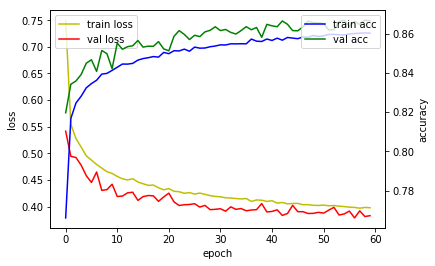

In [14]:
import matplotlib.pyplot as plt

print(hist.history.keys())

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.savefig('res4.png')
plt.show()

